In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_excel(r"C:\Users\zhuzh\OneDrive\Рабочий стол\EAE\Data Science\trabajo_final\Creditcardclients.xls")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.shape

(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
del df["ID"]

In [7]:
df["default payment next month"].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [8]:
for i in df.columns:
    print(i)
    print(df[i].value_counts(normalize=True)*100)
    print("***************")

LIMIT_BAL
50000      11.216667
20000       6.586667
30000       5.366667
80000       5.223333
200000      5.093333
             ...    
800000      0.006667
760000      0.003333
690000      0.003333
1000000     0.003333
327680      0.003333
Name: LIMIT_BAL, Length: 81, dtype: float64
***************
SEX
2    60.373333
1    39.626667
Name: SEX, dtype: float64
***************
EDUCATION
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64
***************
MARRIAGE
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64
***************
AGE
29    5.350000
27    4.923333
28    4.696667
30    4.650000
26    4.186667
31    4.056667
25    3.953333
34    3.873333
32    3.860000
33    3.820000
24    3.756667
35    3.710000
36    3.693333
37    3.470000
39    3.180000
38    3.146667
23    3.103333
40    2.900000
41    2.746667
42    2.646667
44    2.333333
43    2.233333
45    2.05

In [9]:
df.shape

(30000, 24)

# visualizacion de datos

### tenemos la mayoria de los datos categoricos, excepto la edad, limit bal y Bill AMT

In [10]:
df['default payment next month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

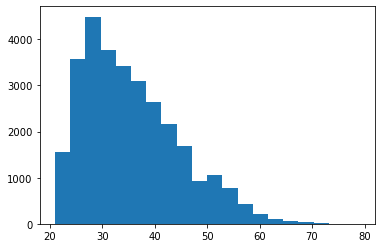

In [11]:
# la distribucion sesgada a la derecha
plt.hist(df['AGE'], bins=20)
plt.show()

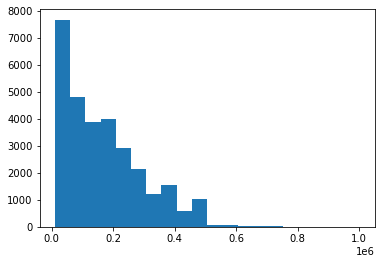

In [12]:
# la distribucion sesgada a la derecha tambien
plt.hist(df['LIMIT_BAL'], bins=20)
plt.show()

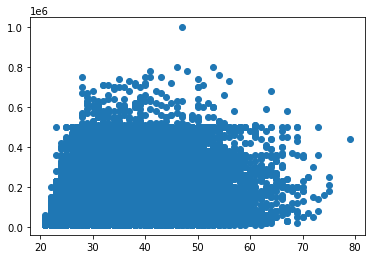

In [13]:
#no hay ninguna relacion 
plt.scatter(df['AGE'], df['LIMIT_BAL'])

In [14]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

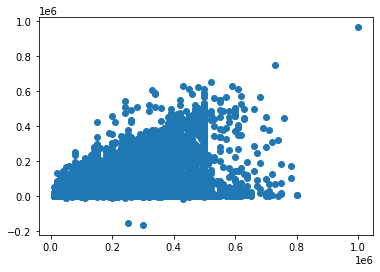

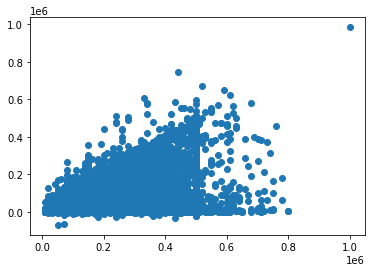

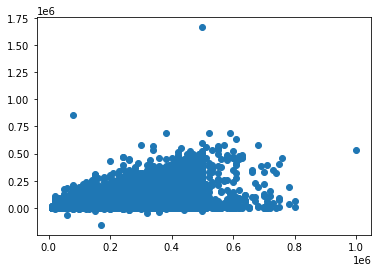

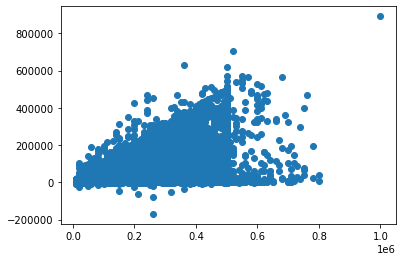

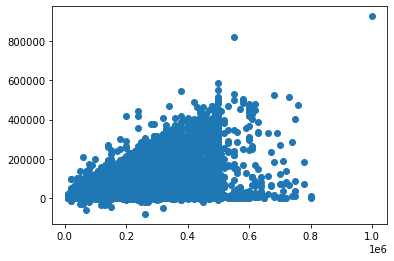

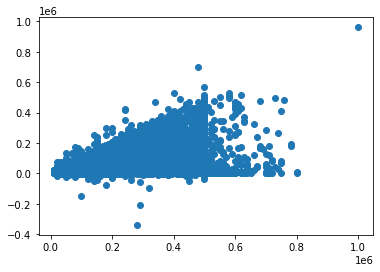

In [15]:
#no hay ninguna relacion entre esas variables y todos tienen el comportamiento parecido 

for i in [df['BILL_AMT1'], df['BILL_AMT2'], df['BILL_AMT3'], df['BILL_AMT4'], df['BILL_AMT5'], df['BILL_AMT6']]:
    plt.subplots()
    plt.scatter(df['LIMIT_BAL'],i)
    plt.show()

C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zhuzh\anaconda3\lib\si

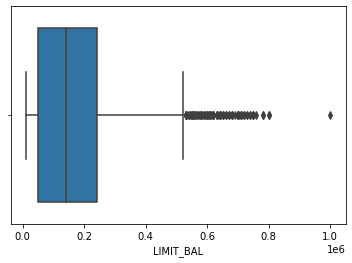

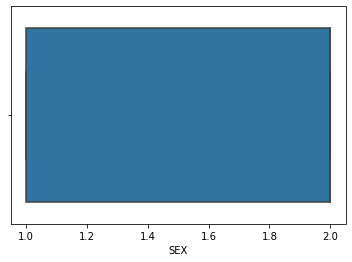

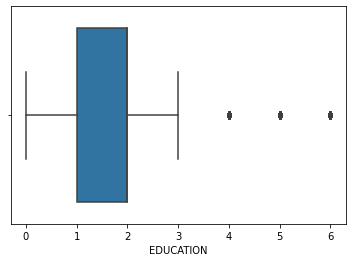

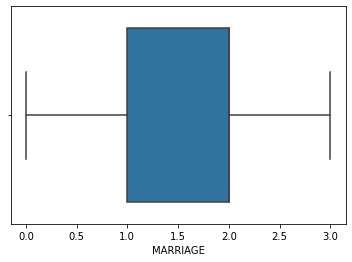

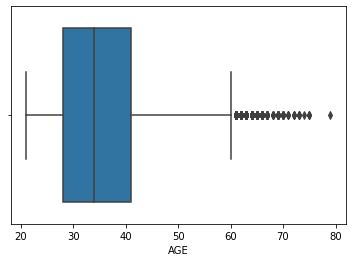

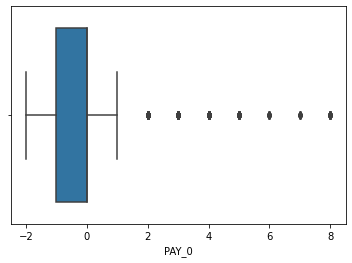

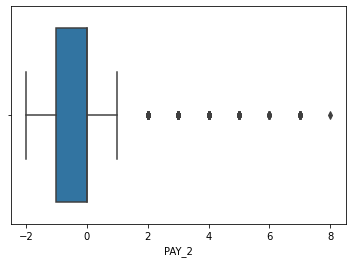

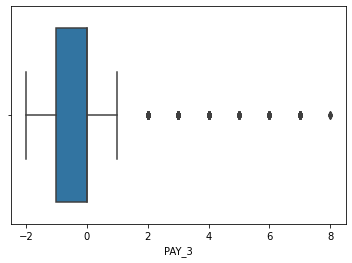

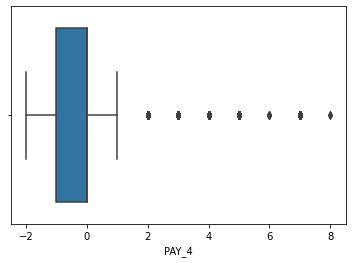

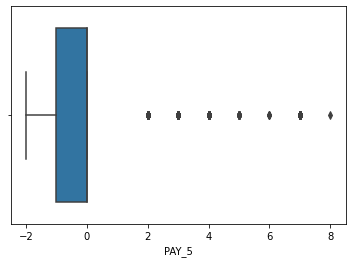

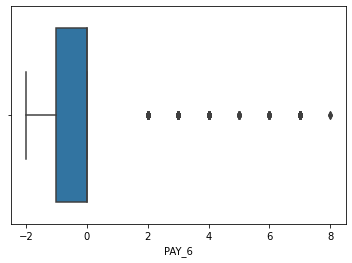

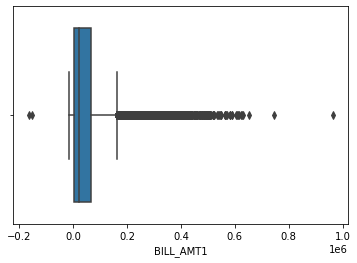

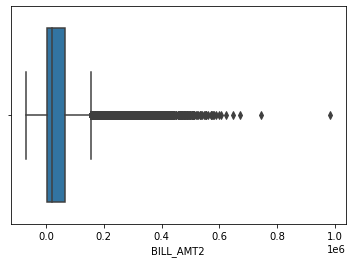

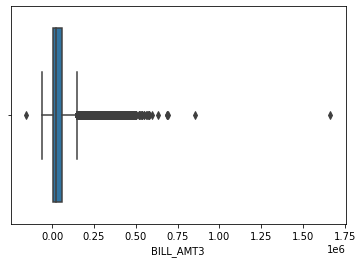

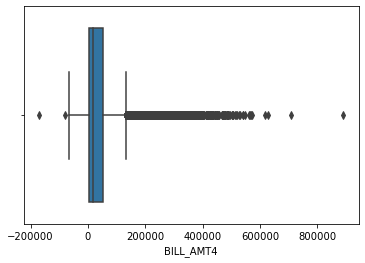

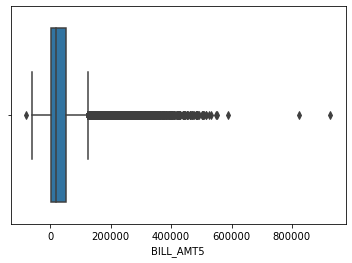

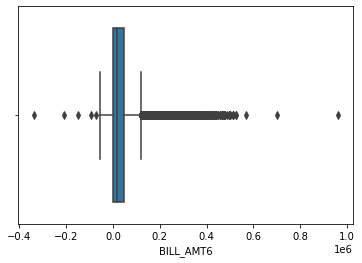

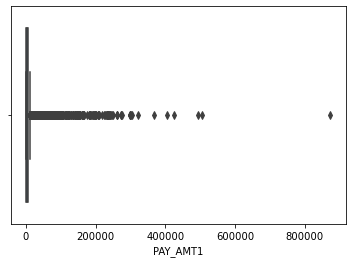

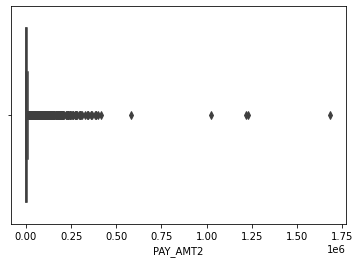

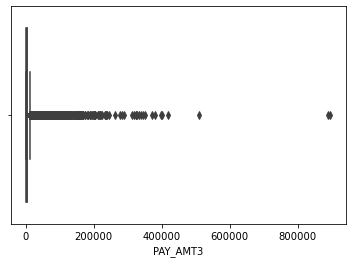

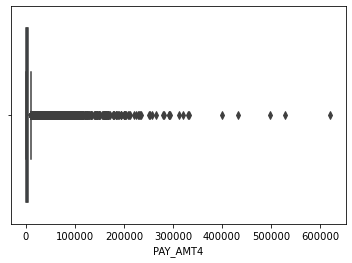

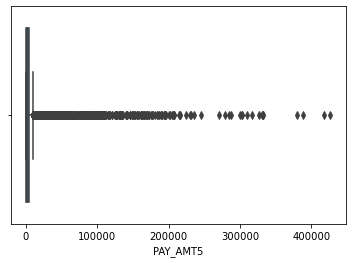

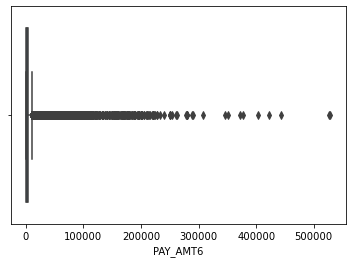

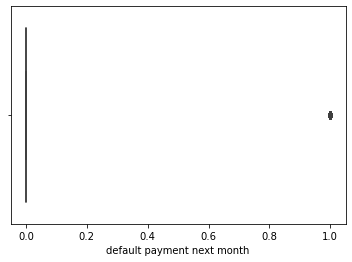

In [16]:
#box plots 
# las variables de PAY  y BILL AMT tienen bastantes outliers 

for i in df.columns: 
    plt.subplots()
    sns.boxplot(df[i])
    plt.plot()

C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zhuzh\anacond

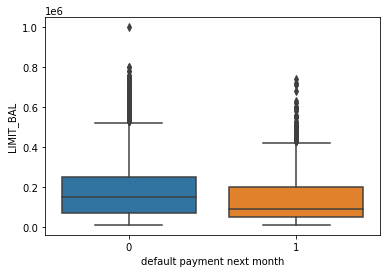

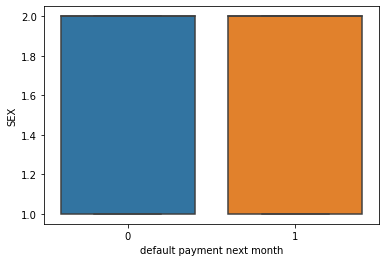

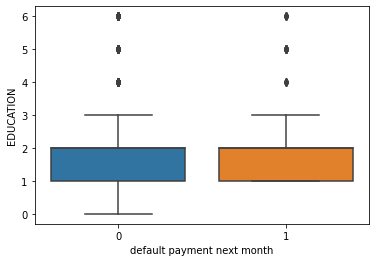

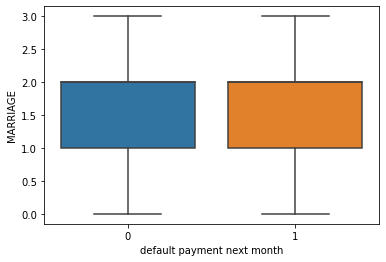

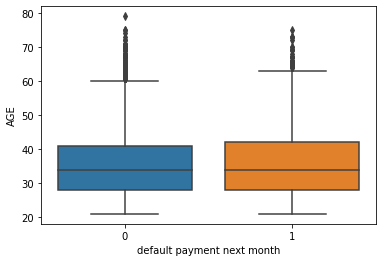

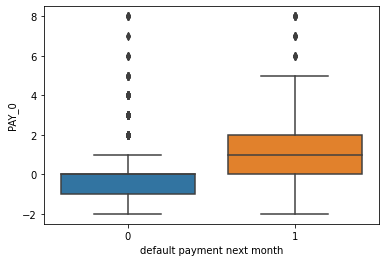

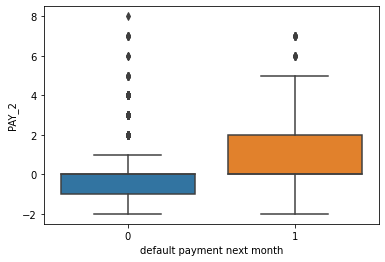

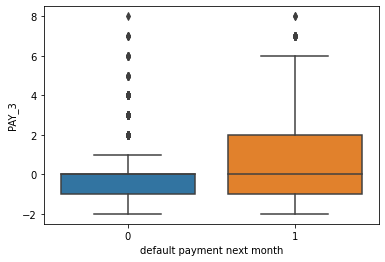

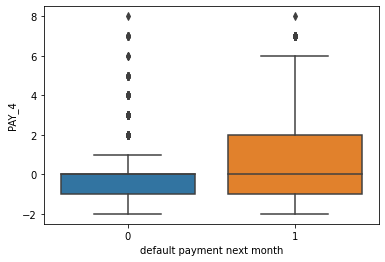

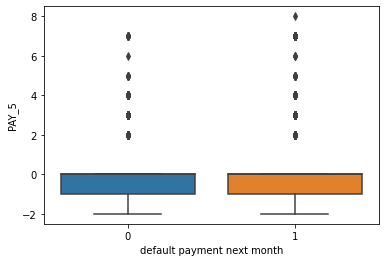

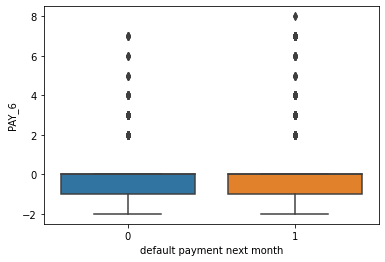

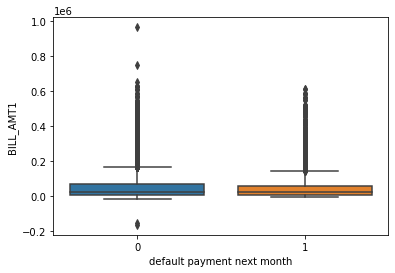

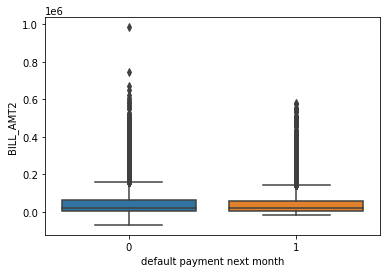

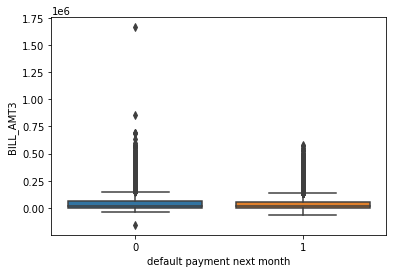

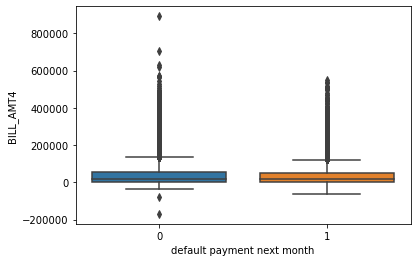

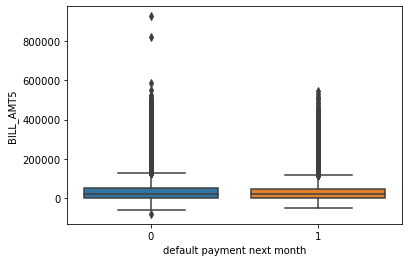

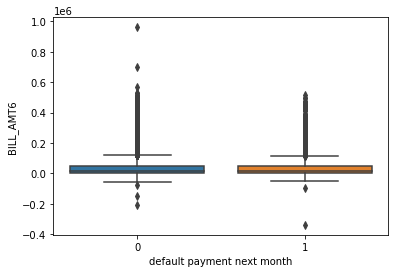

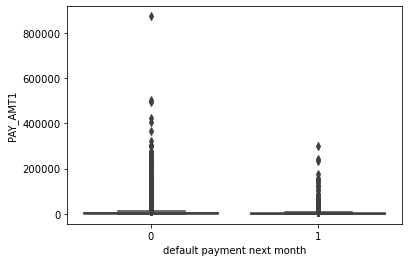

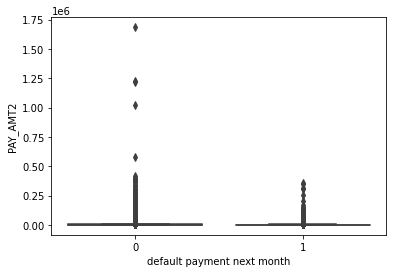

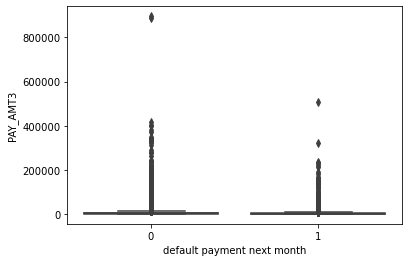

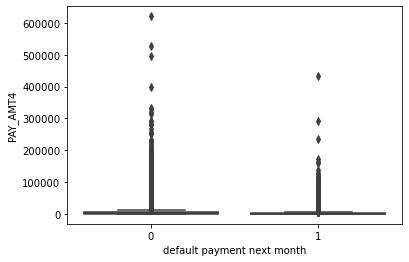

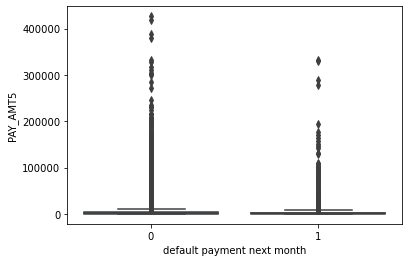

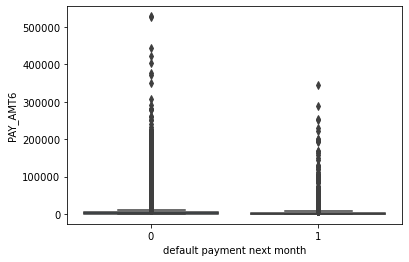

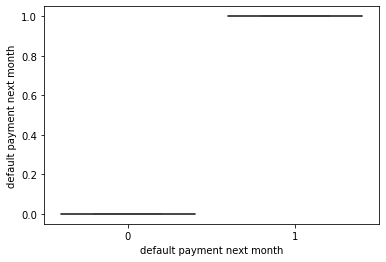

In [17]:
#comparacion de la relacion entre la variable target y el resto de las variables

for i in df.columns: 
    plt.subplots()
    sns.boxplot(df["default payment next month"], df[i])
    plt.plot()

## el resto de los graficos se encuentran en dataiku 
los resultados :
La variable target está desbalanceada (22% si pagarán, y 78% no pagarán)
Educacion: Las categorías de 0 4, 5 y 6 podemos unir en una o eliminarlas por completo.
Marriage: No hay mucha diferencia entre los pagos y el estado civil. Podríamos valorar si eliminar esta variable por completo.
Las variables de Limit Bal y la edad tienen una distribución asimétrica positiva. Podemos aplicar el logaritmo para intentar que la distribución sea normal. 
Consideramos que las variables de sexo y edad podrían ser importantes para la predicción.
La variable PAYAMT igual que tenga 0 o 1 no cambia el comportamiento de la variable target por lo que la vamos a eliminar 
Eliminaremos los outliers de las variables BILLAMT 
Las variables PAY tienen muchas categorias, podemos juntarlas en menos categorias

# Preparacion de los datos

In [18]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [19]:
df['EDUCATION'] = df['EDUCATION'].replace({5:3, 4:3, 6:3,0:3})

In [20]:
del df['MARRIAGE']

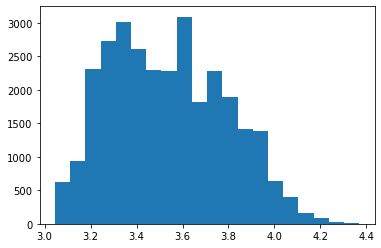

In [21]:
#se parece mas a normal despues de aplicar logaritmo 
plt.hist(np.log(df["AGE"]), bins=20)
plt.show()

In [22]:
df["AGE"] = np.log(df["AGE"])

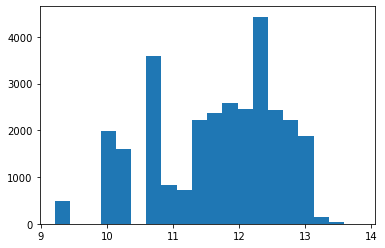

In [23]:
plt.hist(np.log(df["LIMIT_BAL"]), bins=20)
plt.show()

In [24]:
df["LIMIT_BAL"] = np.log(df["LIMIT_BAL"])

In [25]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,11.663002,1.603733,1.826667,3.536971,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,0.941135,0.489129,0.708735,0.251541,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,9.210340,1.000000,1.000000,3.044522,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,10.819778,1.000000,1.000000,3.332205,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,11.849398,2.000000,2.000000,3.526361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,12.388394,2.000000,2.000000,3.713572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,13.815511,2.000000,3.000000,4.369448,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<AxesSubplot:>

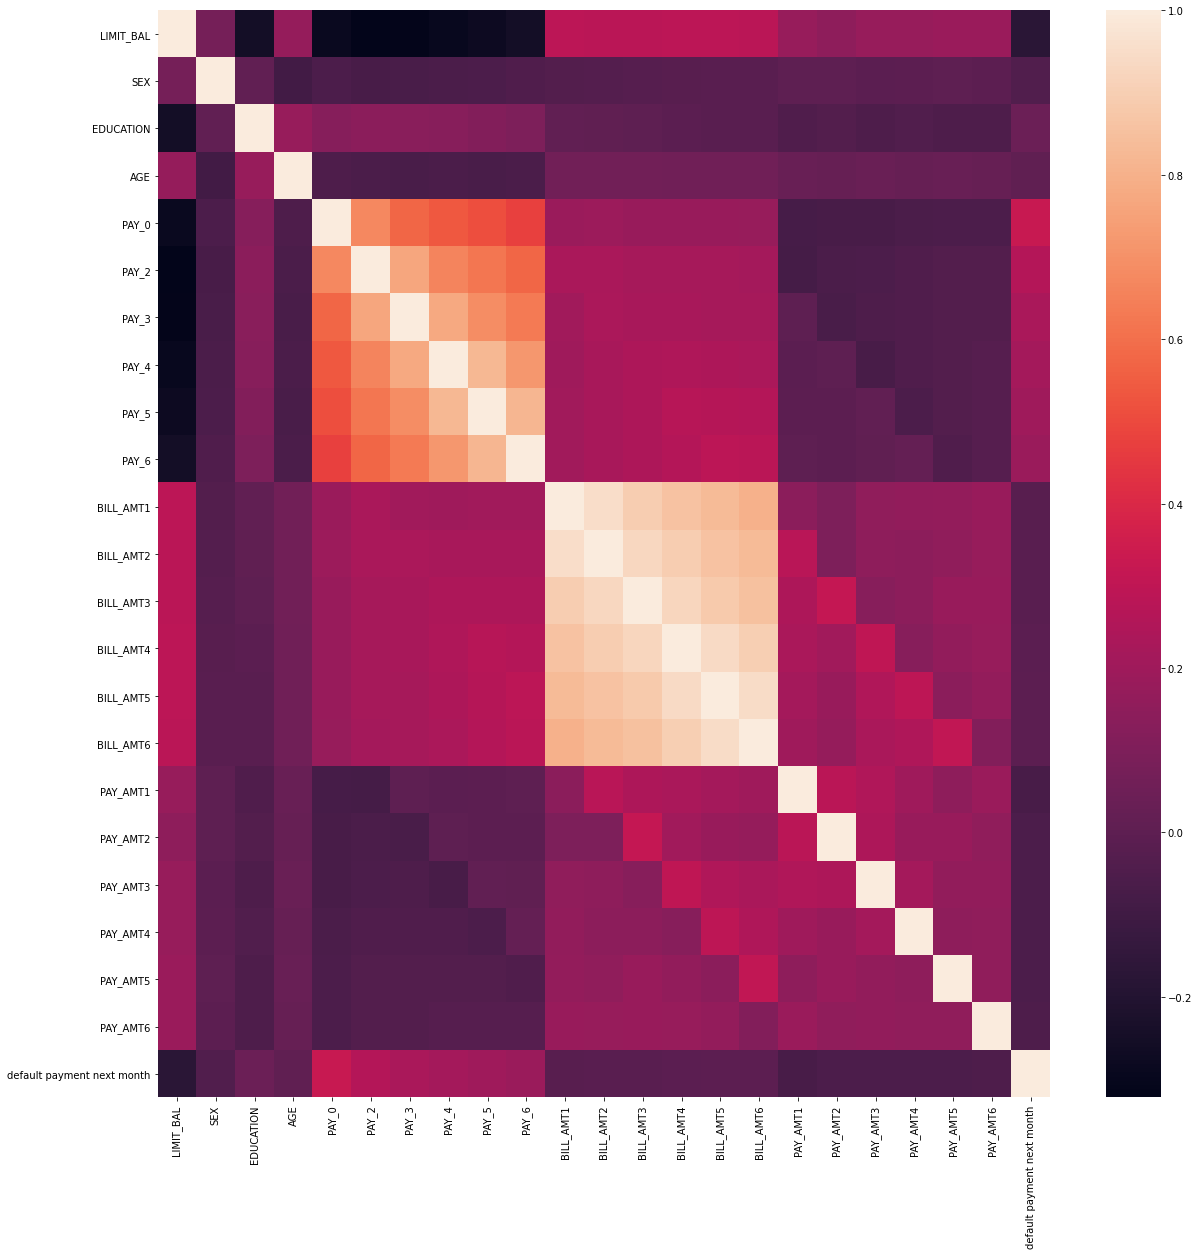

In [26]:
#no hay mucha corelacion entre la variable target y otras variables 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [27]:
#las variables que tienen menor correlacion con la variable target
df.drop(["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"],axis=1,inplace=True)

In [28]:
df.shape

(30000, 17)

In [29]:
#hay muchos valores outliers de BILL AMT , cuando el 75% es menos de 100 000, y el maximo el sobre un millon. 
#vamos a probar a filtrar los valores extremos a menos de 100 000
df.describe()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,11.663002,1.603733,1.826667,3.536971,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,0.221200
std,0.941135,0.489129,0.708735,0.251541,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,0.415062
min,9.210340,1.000000,1.000000,3.044522,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000
25%,10.819778,1.000000,1.000000,3.332205,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,0.000000
50%,11.849398,2.000000,2.000000,3.526361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,0.000000
75%,12.388394,2.000000,2.000000,3.713572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,0.000000
max,13.815511,2.000000,3.000000,4.369448,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,1.000000


In [30]:
#hemos eliminado 3500 observaciones

df_filtrado = df[(df['BILL_AMT1']<150000) & (df['BILL_AMT2']<150000) & (df['BILL_AMT3']<150000) &(df['BILL_AMT4']<150000) &(df['BILL_AMT5']<150000) & (df['BILL_AMT6']<150000 )]

df_filtrado.describe()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default payment next month
count,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.00000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000
mean,11.559031,1.609219,1.835142,3.531006,-0.045274,-0.172229,-0.201377,-0.255931,-0.303300,-0.33054,31598.189216,30425.762067,29074.530569,26950.251104,25266.759934,24456.524321,0.225211
std,0.936523,0.487934,0.708881,0.254048,1.142417,1.223350,1.229786,1.205467,1.168457,1.18497,35978.762259,35016.227920,33930.612214,32239.102391,31200.992442,31279.699986,0.417729
min,9.210340,1.000000,1.000000,3.044522,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.00000,-15308.000000,-69777.000000,-61506.000000,-81334.000000,-81334.000000,-339603.000000,0.000000
25%,10.819778,1.000000,1.000000,3.332205,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,2576.750000,2197.000000,1894.500000,1576.000000,1200.000000,856.000000,0.000000
50%,11.695247,2.000000,2.000000,3.526361,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17680.000000,17329.500000,16991.000000,15818.000000,14337.500000,12646.500000,0.000000
75%,12.254863,2.000000,2.000000,3.713572,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,49181.250000,48407.750000,46399.000000,40718.000000,36522.000000,34880.250000,0.000000
max,13.592367,2.000000,3.000000,4.317488,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,149941.000000,149890.000000,149506.000000,149984.000000,149712.000000,149861.000000,1.000000


In [31]:
df_filtrado.shape

(26726, 17)

In [32]:
df_filtrado.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'default payment next month'],
      dtype='object')

In [33]:
# agrupar las categorias que tienen pocos datos 

df_filtrado["PAY_0"].value_counts() 

 0    12244
-1     5536
 1     3506
-2     2677
 2     2342
 3      305
 4       66
 5       22
 8       14
 6        9
 7        5
Name: PAY_0, dtype: int64

In [34]:
df_filtrado["PAY_0"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2}).value_counts()

 0    12244
-1     5536
 1     3506
 2     2763
-2     2677
Name: PAY_0, dtype: int64

In [35]:
df_filtrado["PAY_0"] =df_filtrado["PAY_0"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2})

<ipython-input-35-595578d3fdcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["PAY_0"] =df_filtrado["PAY_0"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2})


In [36]:
df_filtrado["PAY_2"].value_counts() 

 0    13087
-1     5891
-2     3709
 2     3580
 3      302
 4       89
 1       24
 5       21
 7       15
 6        7
 8        1
Name: PAY_2, dtype: int64

In [37]:
df_filtrado["PAY_2"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2}).value_counts()

 0    13087
-1     5891
 2     4039
-2     3709
Name: PAY_2, dtype: int64

In [38]:
df_filtrado['PAY_2'] = df_filtrado["PAY_2"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2})

<ipython-input-38-5b23294c1feb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['PAY_2'] = df_filtrado["PAY_2"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2})


In [39]:
df_filtrado["PAY_3"].value_counts() 

 0    13071
-1     5772
-2     4000
 2     3527
 3      224
 4       65
 7       27
 6       18
 5       16
 8        3
 1        3
Name: PAY_3, dtype: int64

In [40]:
df_filtrado["PAY_3"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2}).value_counts()

 0    13071
-1     5772
-2     4000
 2     3883
Name: PAY_3, dtype: int64

In [41]:
df_filtrado["PAY_3"] = df_filtrado["PAY_3"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2})

<ipython-input-41-a9b075bfcbed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["PAY_3"] = df_filtrado["PAY_3"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2})


In [42]:
df_filtrado["PAY_4"].value_counts() 

 0    13699
-1     5517
-2     4259
 2     2930
 3      165
 4       61
 7       57
 5       30
 6        5
 8        2
 1        1
Name: PAY_4, dtype: int64

In [43]:
df_filtrado["PAY_4"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2}).value_counts()

 0    13699
-1     5517
-2     4259
 2     3251
Name: PAY_4, dtype: int64

In [44]:
df_filtrado["PAY_4"] = df_filtrado["PAY_4"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2})

<ipython-input-44-73685b1247ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["PAY_4"] = df_filtrado["PAY_4"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2})


In [45]:
df_filtrado["PAY_5"].value_counts() 

 0    14179
-1     5372
-2     4441
 2     2408
 3      172
 4       76
 7       58
 5       16
 6        3
 8        1
Name: PAY_5, dtype: int64

In [46]:
df_filtrado["PAY_5"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2}).value_counts()

 0    14179
-1     5372
-2     4441
 2     2734
Name: PAY_5, dtype: int64

In [47]:
df_filtrado["PAY_5"] = df_filtrado["PAY_5"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2})

<ipython-input-47-7a6ded492bbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["PAY_5"] = df_filtrado["PAY_5"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2})


In [48]:
df_filtrado["PAY_6"].value_counts() 

 0    13555
-1     5556
-2     4781
 2     2534
 3      176
 4       47
 7       46
 6       17
 5       12
 8        2
Name: PAY_6, dtype: int64

In [49]:
df_filtrado["PAY_6"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2}).value_counts()

 0    13555
-1     5556
-2     4781
 2     2834
Name: PAY_6, dtype: int64

In [50]:
df_filtrado["PAY_6"] = df_filtrado["PAY_6"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2})

<ipython-input-50-b69b4952dce3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["PAY_6"] = df_filtrado["PAY_6"].replace({7:2, 6:2, 8:2, 5:2, 4:2, 3:2, 1:2})


In [51]:
df_filtrado.describe()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default payment next month
count,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000
mean,11.559031,1.609219,1.835142,3.531006,-0.069520,-0.195727,-0.224725,-0.281860,-0.328744,-0.353588,31598.189216,30425.762067,29074.530569,26950.251104,25266.759934,24456.524321,0.225211
std,0.936523,0.487934,0.708881,0.254048,1.071317,1.158354,1.159889,1.118494,1.080201,1.105723,35978.762259,35016.227920,33930.612214,32239.102391,31200.992442,31279.699986,0.417729
min,9.210340,1.000000,1.000000,3.044522,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-15308.000000,-69777.000000,-61506.000000,-81334.000000,-81334.000000,-339603.000000,0.000000
25%,10.819778,1.000000,1.000000,3.332205,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2576.750000,2197.000000,1894.500000,1576.000000,1200.000000,856.000000,0.000000
50%,11.695247,2.000000,2.000000,3.526361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17680.000000,17329.500000,16991.000000,15818.000000,14337.500000,12646.500000,0.000000
75%,12.254863,2.000000,2.000000,3.713572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49181.250000,48407.750000,46399.000000,40718.000000,36522.000000,34880.250000,0.000000
max,13.592367,2.000000,3.000000,4.317488,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,149941.000000,149890.000000,149506.000000,149984.000000,149712.000000,149861.000000,1.000000


Feature ranking:
1. feature 4 (0.104894)
2. feature 10 (0.097375)
3. feature 3 (0.097041)
4. feature 11 (0.090380)
5. feature 12 (0.086673)
6. feature 15 (0.086082)
7. feature 13 (0.084927)
8. feature 14 (0.084231)
9. feature 0 (0.078973)
10. feature 5 (0.042843)
11. feature 6 (0.029617)
12. feature 7 (0.028215)
13. feature 2 (0.025982)
14. feature 8 (0.024441)
15. feature 9 (0.021932)
16. feature 1 (0.016394)


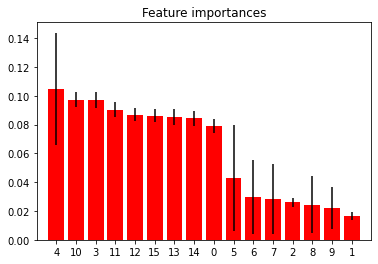

In [54]:
# Evaluar feature importance

X = df_filtrado.drop("default payment next month",axis=1)
y = df_filtrado["default payment next month"] 



# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_jobs=-1) # paralelicemos la ejecución
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1] # orden descendente

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [43]:
for i,j in zip(range(len(df_filtrado.columns)),df_filtrado.columns):
    print(i,j)

0 LIMIT_BAL
1 SEX
2 EDUCATION
3 AGE
4 PAY_0
5 PAY_2
6 PAY_3
7 PAY_4
8 PAY_5
9 PAY_6
10 BILL_AMT1
11 BILL_AMT2
12 BILL_AMT3
13 BILL_AMT4
14 BILL_AMT5
15 BILL_AMT6
16 default payment next month


### Las variables mas importantes son : Age, PAY 0 y LIMIT_BAL

### La variable menos importante es Sex, la vamos a eliminar 

In [44]:
del df_filtrado['SEX']

# MODELADO

## Naive Bayes

In [45]:
# Naive bayes
X = df_filtrado.drop("default payment next month", axis=1).values
y = df_filtrado["default payment next month"].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)


0.8023197804938887

In [45]:
recall_score(y_test,y_pred) 

0.3052164261931188

In [46]:
f1_score(y_test,y_pred)

0.415564790328674

#### Accuracy es bueno pero recall score es muy bajo, el motivo es el desbalance de clases

## Ada boost

In [47]:
X = df_filtrado.drop("default payment next month", axis=1).values
y = df_filtrado["default payment next month"].values

ada = AdaBoostClassifier()

params={'n_estimators': [50, 100, 200, 300 ,400, 250],
        'learning_rate': [0.2, 0.4 , 0.5, 0.8, 1, 1.5 ,2 ,3, 5]}

scorers = {"f1_macro","accuracy","recall_macro"}
clf = RandomizedSearchCV(estimator=ada,
                         param_distributions=params,
                         scoring=scorers,
                         refit='f1_macro',
                         cv = 5,
                         n_jobs=-1
                        )

search_ada = clf.fit(X, y)

In [54]:
search_ada.best_estimator_
# n_estimators=50 by default 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=200, random_state=None)

In [55]:
X = df_filtrado.drop("default payment next month", axis=1).values
y = df_filtrado["default payment next month"].values


X_train, X_test, y_train, y_test = train_test_split( X , y, test_size=0.3)

clf = AdaBoostClassifier(learning_rate=0.4)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy_score(y_test,yhat)


0.8098029433774009

In [56]:
confusion_matrix(y_test,yhat)

array([[5944,  286],
       [1239,  549]])

In [57]:
recall_score(y_test,yhat) 

0.3070469798657718

In [58]:
f1_score(y_test,y_pred)

0.16255222180022785

##### Resultado parecido que con el Naive Bayes. recall score muy bajo 

# Balanceo de clases 

In [46]:
X = df_filtrado.drop("default payment next month", axis=1).values
y = df_filtrado["default payment next month"].values
from sklearn.preprocessing import MinMaxScaler
madmax = MinMaxScaler()
madmax.fit(X)
X  = madmax.transform(X)

In [47]:
df_filtrado['default payment next month'].value_counts()

0    20707
1     6019
Name: default payment next month, dtype: int64

In [48]:
import imblearn 
from imblearn.over_sampling import SMOTE 

In [49]:
oversampling = SMOTE() #sampling_strategy=0.80 #la clase minoritaria se anade hasta 80% 
X_balanceado, y_balanceado = oversampling.fit_resample(X, y)

In [50]:
X_balanceado.shape

(41414, 15)

In [51]:
y_balanceado.shape

(41414,)

In [52]:
from collections import Counter
Counter(y_balanceado)

# la clase 1 se ha añadido a 80% de la clase 0 

Counter({1: 20707, 0: 20707})

## Regresion logistica 

Vamos a utilizar strtified K fold cross validation 

The k-fold cross-validation procedure involves splitting the training dataset into k folds. The first k-1 folds are used to train a model, and the holdout kth fold is used as the test set. This process is repeated and each of the folds is given an opportunity to be used as the holdout test set. A total of k models are fit and evaluated, and the performance of the model is calculated as the mean of these runs.

Stratified kfold cross validation is an extension of regular kfold cross validation but specifically for classification problems where rather than the splits being completely random, the ratio between the target classes is the same in each fold as it is in the full dataset. 

In [53]:
skf = StratifiedKFold(n_splits=10)

yhat = []
ycomp = []

for train_index, test_index in skf.split(X_balanceado, y_balanceado):
    X_train, X_test = X_balanceado[train_index], X_balanceado[test_index]
    y_train, y_test = y_balanceado[train_index], y_balanceado[test_index]
    
    ycomp.extend(y_balanceado[test_index])   #los patrones y aleatorios del dataset , no primeros del data set (dividido por grupos)
    clflog = LogisticRegression(max_iter=200)
    clflog.fit(X_train, y_train)
    print(clflog.score(X_test, y_test)) #accuracy
    
    yhat1 = clflog.predict(X_test)
    yhat.extend(yhat1)
print('Recall: ', recall_score(ycomp, yhat) )

0.6475132786093675
0.6735876388218252
0.6552390149686141
0.6581361661033317
0.6645737744506158
0.6524993962810915
0.6841342670852452
0.6913788939869596
0.693069306930693
0.6831683168316832
Recall:  0.6448061042159656


In [54]:
f1_score(ycomp, yhat)

0.661694377679213

In [56]:
accuracy_score(ycomp,yhat)

0.6703288742937171

In [79]:
confusion_matrix(ycomp, yhat)

array([[14424,  6283],
       [ 7405, 13302]], dtype=int64)

#### la matriz de confusion es bastante mejor que antes de balanceo

## Grid search para random forest

In [57]:
rf = RandomForestClassifier()

params={'n_estimators': [50, 100,500,800],
        'criterion': ['gini', 'entropy'],
        'max_depth': [10,20,40],
        'min_samples_split': [100, 300,500],
        'min_samples_leaf': range(20,50)
       }

scorers = {"f1_macro","accuracy","recall_macro"}

clf = RandomizedSearchCV(estimator=rf,
                         param_distributions=params,
                         scoring=scorers,
                         refit='f1_macro',
                         cv = 10,
                         n_jobs=-1
                        )

search_rf = clf.fit(X_balanceado, y_balanceado)

In [58]:
search_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=26,
                       min_samples_split=100)

In [59]:
skf = StratifiedKFold(n_splits=10)

yhat = []
ycomp = []

for train_index, test_index in skf.split(X_balanceado, y_balanceado):
    X_train, X_test = X_balanceado[train_index], X_balanceado[test_index]
    y_train, y_test = y_balanceado[train_index], y_balanceado[test_index]
    
    ycomp.extend(y_balanceado[test_index])   #los patrones y aleatorios del dat

    clfrf = RandomForestClassifier(max_depth=40, min_samples_leaf=26, min_samples_split=100,
                       n_estimators=500, n_jobs= -1
                                   )

    clfrf.fit(X_train, y_train)
    
    print(clfrf.score(X_test, y_test))
    
    yhat1 = clfrf.predict(X_test)
    yhat.extend(yhat1)
    
    
print('Recall: ', recall_score(ycomp, yhat) )
    

0.7003862868179623
0.7346692419121198
0.7197006277160792
0.7769193626267503
0.7746921033566772
0.7621347500603719
0.7961844964984304
0.7836271432021251
0.7886983820333253
0.7848345810190775
Recall:  0.7077316849374607


In [60]:
accuracy_score(ycomp, yhat)

0.762181870864925

In [61]:
f1_score(ycomp, yhat)

0.7484869378686891

In [62]:
confusion_matrix(ycomp, yhat)

array([[16910,  3797],
       [ 6052, 14655]])

## Aga boost Grid 

In [87]:


ada = AdaBoostClassifier()

params={'n_estimators': [20, 50, 100],
        'learning_rate': [0.1, 0.2, 0.5, 0.8, 1]}

scorers = {"f1_macro","accuracy","recall_macro"}
clf = RandomizedSearchCV(estimator=ada,
                         param_distributions=params,
                         scoring=scorers,
                         refit='f1_macro',
                         cv = 5,
                         n_jobs=-1
                        )

search_ada = clf.fit(X_balanceado, y_balanceado)


In [88]:
search_ada.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [89]:
skf = StratifiedKFold(n_splits=10)

yhat = []
ycomp = []

for train_index, test_index in skf.split(X_balanceado, y_balanceado):
    X_train, X_test = X_balanceado[train_index], X_balanceado[test_index]
    y_train, y_test = y_balanceado[train_index], y_balanceado[test_index]
    
    ycomp.extend(y_balanceado[test_index])   #los patrones y aleatorios del dat

    clfada = AdaBoostClassifier(learning_rate=1, n_estimators=100 )

    clfada.fit(X_train, y_train)
    
    print(clfada.score(X_test, y_test))
    
    yhat1 = clfada.predict(X_test)
    yhat.extend(yhat1)
    
    
print('Recall: ', recall_score(ycomp, yhat) )

0.6576533075808788
0.6957991308546596
0.6834862385321101
0.7295992274263641
0.7300169041294373
0.7087659985510746
0.7474040086935523
0.7384689688481043
0.7495773967640667
0.7285679787490944
Recall:  0.6133674602791327


In [90]:
accuracy_score(ycomp, yhat)

0.7169314724489303

In [91]:
f1_score(ycomp, yhat)

0.6842289562289562

In [92]:
confusion_matrix(ycomp, yhat)

array([[16990,  3717],
       [ 8006, 12701]], dtype=int64)

## SVM 

In [93]:
modelo_svc = svm.SVC()
params={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'class_weight': [{0:1, 1:3}, {0:1, 1:1}, 'balanced'] }

scorers = {"f1_macro","accuracy","recall_macro"}
clfsvc = RandomizedSearchCV(estimator=modelo_svc,
                         param_distributions=params,
                         scoring=scorers,
                         refit='f1_macro',
                         cv = 5,
                         n_jobs=-1
                        )

search_svc = clfsvc.fit(X_balanceado, y_balanceado)

In [95]:
# ‘rbf’ by default
search_svc.best_estimator_

SVC(class_weight={0: 1, 1: 1})

In [96]:
skf = StratifiedKFold(n_splits=10)
#skf.get_n_splits(X, y)

yhat = []
ycomp = []

for train_index, test_index in skf.split(X_balanceado, y_balanceado):
    
    X_train, X_test = X_balanceado[train_index], X_balanceado[test_index]
    y_train, y_test = y_balanceado[train_index], y_balanceado[test_index]
    
    
    clfs = svm.SVC(kernel='rbf',class_weight={0: 1, 1: 1})

    ycomp.extend(y_balanceado[test_index])
    clfs.fit(X_train, y_train)
    
    print(clfs.score(X_test, y_test))
    
    yhat1 = clfs.predict(X_test)
    yhat.extend(yhat1)
    
print('Recall: ', recall_score(ycomp, yhat) )

0.6755190729116369
0.7083534524384355
0.677691936262675
0.6933848382423949
0.6911374064235691
0.6732673267326733
0.6945182323110359
0.7003139338324076
0.7075585607341222
0.6916203815503501
Recall:  0.5402037958178394


In [97]:
accuracy_score(ycomp, yhat)

0.691336263099435

In [98]:
f1_score(ycomp, yhat)

0.6363817380173518

In [101]:
confusion_matrix(ycomp, yhat)

array([[17445,  3262],
       [ 9521, 11186]], dtype=int64)

# XG Boost

In [135]:
modelo_xgb =  XGBClassifier()
params={'n_estimators': [100,500,800],
        'learning_rate': [0.1, 0.2, 0.5, 0.8, 1],
        'max_depth':[10,20,30], 
       'objective':['binary:logistic']} #porque tenemos el problema de clasificacion , tambien hay xgboost de regression

scorers = {"f1_macro","accuracy","recall_macro"}
clfxgb = RandomizedSearchCV(estimator=modelo_xgb,
                         param_distributions=params,
                         scoring=scorers,
                         refit='f1_macro',
                         cv = 5,
                         n_jobs=-1
                        )

search_xgb = clfxgb.fit(X_balanceado, y_balanceado)

C:\Users\zhuzh\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:22:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [136]:
search_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [137]:
skf = StratifiedKFold(n_splits=10)
#skf.get_n_splits(X, y)

yhat = []
ycomp = []

for train_index, test_index in skf.split(X_balanceado, y_balanceado):
    
    X_train, X_test = X_balanceado[train_index], X_balanceado[test_index]
    y_train, y_test = y_balanceado[train_index], y_balanceado[test_index]
    
    
    clfxb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
    

    ycomp.extend(y_balanceado[test_index])
    clfxb.fit(X_train, y_train)
    
    print(clfxgb.score(X_test, y_test))
    
    yhat1 = clfxb.predict(X_test)
    yhat.extend(yhat1)
    
print('Recall: ', recall_score(ycomp, yhat) )

C:\Users\zhuzh\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:25:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9966199517275854
[21:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9973442705414366
[21:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9971028380576005
[21:27:40] WA

In [138]:
accuracy_score(ycomp, yhat)

0.8684502825131598

In [139]:
f1_score(ycomp, yhat)

0.8657665204750408

In [140]:
print(classification_report(ycomp, yhat, digits=3)) 

              precision    recall  f1-score   support

           0      0.854     0.888     0.871     20707
           1      0.884     0.848     0.866     20707

    accuracy                          0.868     41414
   macro avg      0.869     0.868     0.868     41414
weighted avg      0.869     0.868     0.868     41414



In [141]:
cf = confusion_matrix(ycomp, yhat)
cf

array([[18397,  2310],
       [ 3138, 17569]], dtype=int64)

<AxesSubplot:>

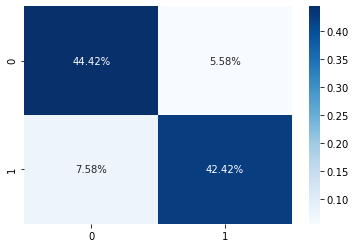

In [142]:
sns.heatmap(cf/ np.sum(cf), fmt='.2%', cmap='Blues', annot=True)

## K neighbours Classifier 

In [122]:
knn  = KNeighborsClassifier()
params={'n_neighbors': [1,2,3,4],
        'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'] }

scorers = {"f1_macro","accuracy","recall_macro"}
clfknn = RandomizedSearchCV(estimator= knn,
                         param_distributions=params,
                         scoring=scorers,
                         refit='f1_macro',
                         cv = 5,
                         n_jobs=-1
                        )

search_knn = clfknn.fit(X_balanceado, y_balanceado)

In [123]:
search_knn.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [124]:
skf = StratifiedKFold(n_splits=10)


yhat = []
ycomp = []

for train_index, test_index in skf.split(X_balanceado, y_balanceado):
    
    X_train, X_test = X_balanceado[train_index], X_balanceado[test_index]
    y_train, y_test = y_balanceado[train_index], y_balanceado[test_index]
    
    
    knn = KNeighborsClassifier(n_neighbors=1)

    ycomp.extend(y_balanceado[test_index])
    knn.fit(X_train, y_train)
    
    print(knn.score(X_test, y_test))
    
    yhat1 = knn.predict(X_test)
    yhat.extend(yhat1)
print('Recall: ', recall_score(ycomp, yhat) )    

0.8172380492515693
0.8194109126026075
0.8380009657170449
0.8428295509415741
0.8473798599372132
0.8345810190775175
0.8413426708524511
0.8485872977541656
0.8493117604443371
0.8415841584158416
Recall:  0.9274158497126576


In [125]:
accuracy_score(ycomp, yhat)

0.8380257883807408

In [126]:
f1_score(ycomp, yhat)

0.8513166060820995

In [127]:
print(classification_report(ycomp, yhat, digits=3)) 

              precision    recall  f1-score   support

           0      0.912     0.749     0.822     20707
           1      0.787     0.927     0.851     20707

    accuracy                          0.838     41414
   macro avg      0.849     0.838     0.837     41414
weighted avg      0.849     0.838     0.837     41414



In [133]:
cf = confusion_matrix(ycomp, yhat)
cf

array([[15502,  5205],
       [ 1503, 19204]], dtype=int64)

<AxesSubplot:>

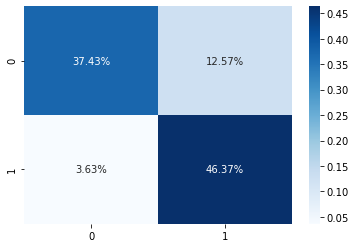

In [134]:
sns.heatmap(cf/ np.sum(cf), fmt='.2%', cmap='Blues', annot=True)

Analizamos los ultimos dos modelos que tienen las métricas mejores : XGBoost y KNN Classifier. 
Mas importante tener menos Falsos positivos, porque si predecimos que el cliente pagará pero en realidad no pagará, es mas dañino para el banco y su planificación de los flujos, comparando con el escenario de que predecimos que el cliente no pagará, pero en realidad paga.

En el modelo XGBoost:
5,5% en realidad 0 (no pagara) pero hemos dicho que si, pagara
7,5% en realidad 1 (pagara) pero hemos dicho que no pagara

En el modelo KNN :
12% en realidad 0 (no pagara) pero hemos dicho que si, pagara 
4% en realidad 1 (pagara) pero hemos dicho que no pagara

## Modelo final

### Finalmente nos quedamos con el modelo XGBoost porque tiene menos Falsos Positivos y predicciones de que pagará cuando en realidad no pagará

In [143]:
final = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
final.fit(X_balanceado, y_balanceado)
yhat = final.predict(X_balanceado)


[21:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [144]:
import pickle 
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(final, open(filename, 'wb'))
